# Importing libraries

In [68]:
import numpy as np
import pandas as pd

# Data cleaning

Read the dataset

In [69]:
black_fri=pd.read_csv('Black-friday.csv')
black_fri

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [70]:
black_fri.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In this dataset 12 columns & 550068 entries are there, some columns include NaN values,incorrect data types.

1) Check basic statistics of dataset



In [71]:
black_fri.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


2) Rename column

In [72]:
black_fri.rename(columns={'City_Category':'city','Stay_In_Current_City_Years':'years in city'},inplace=True)
black_fri.head(2)


,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


3) Drop column

Every column is usefull so no need to drop any column.

4) Check for missing values in the data,missing value treatment,fill nan values.

In [73]:
Nan = pd.DataFrame({'Nan Values' : black_fri.isna().sum().sort_values(ascending=False)})
Nan

,Nan Values
Product_Category_3,383247
Product_Category_2,173638
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
city,0
years in city,0
Marital_Status,0


so,there are NaN values in Product_Category_2 & Product_Category_3 columns, fill NaN values using fillna().



In [74]:
black_fri['Product_Category_2'].unique(),black_fri['Product_Category_2'].dtype


(array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
        10., 17., 13.,  7., 18.]),
 dtype('float64'))

In [75]:
black_fri['Product_Category_3'].unique(),black_fri['Product_Category_3'].dtype


(array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
        18., 11., 10.]),
 dtype('float64'))

Both columns contain NaN values,float values & wrong datatype. So we need to change

1) float object to int datatype.

2) NaN to 0.

so first we have to change NaN value to some integer value, we need to check if there is any value which is same in dataframe as we are giving an integer value to NaN & this NaN value means no any item is bought by any customer. So we can fill it by '0'.

In [76]:
print('0' in black_fri['Product_Category_2'].unique())

False


<ipython-input-76-8e236132ad59>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print('0' in black_fri['Product_Category_2'].unique())


In [77]:
print('0' in black_fri['Product_Category_3'].unique())

False


<ipython-input-77-91452133a9d5>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print('0' in black_fri['Product_Category_3'].unique())


In [78]:
black_fri['Product_Category_2']=black_fri['Product_Category_2'].fillna('0')
black_fri.head()

,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,NaN,7969


In [79]:
black_fri['Product_Category_3']=black_fri['Product_Category_3'].fillna('0')
black_fri.head()

,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


Here we change NaN value to 0.

In [80]:
black_fri[['Product_Category_2','Product_Category_3']]=black_fri[['Product_Category_2','Product_Category_3']].astype('int')
black_fri.head()



,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [81]:
black_fri[['Product_Category_2','Product_Category_3']].dtypes


Product_Category_2    int64
Product_Category_3    int64
dtype: object

Here we change dtype of both columns

4) unique values

In [82]:
for col in black_fri:
    print(black_fri[col].unique())

[1000001 1000002 1000003 ... 1004113 1005391 1001529]
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
[ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]
[ 8370 15200  1422 ...   135   123   613]


Cleaning indivisual column



* 'User_ID' column


In [83]:
black_fri['User_ID'].unique(),black_fri['User_ID'].dtype

(array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529]),
 dtype('int64'))

In this column there are only integer values and datatype is also correct.

so need to clean.

* 'Product_ID' column

In [84]:
black_fri['Product_ID'].unique()


array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

This column include product id & dtype is object so no need to change

because we don't need this column for any operations in data cleaning or in ploting

* 'Gender' column

In [85]:
black_fri['Gender'].unique()


array(['F', 'M'], dtype=object)

In [86]:
black_fri['Gender']=black_fri['Gender'].map({'M':0 , 'F':1})
black_fri.head(2)


,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6,14,15200


* 'Age' column

In [87]:
black_fri['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

Here we see that the 'Age' column has some range of age group & some '+' values and datatype is object.

Need to change:

1) convert range using map function

2) replace '+' values



In [88]:
black_fri['Age']=black_fri['Age'].map({'0-17':'Child','18-25':'Teenage','26-35':'Adult','36-45':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})
black_fri.head(3)


,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,Child,10,A,2,0,1,6,14,15200
2,1000001,P00087842,1,Child,10,A,2,0,12,0,0,1422


In [89]:
black_fri['Age'] = black_fri['Age'].astype(str).apply(lambda x: x.replace('+',''))
black_fri.head(2)


,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,Child,10,A,2,0,1,6,14,15200


In [90]:
black_fri['Age'].unique()


array(['Child', 'Old', 'Adult', 'Teenage'], dtype=object)

* 'Occupation' column

In [91]:
black_fri['Occupation'].unique(),black_fri['Occupation'].dtype


(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6]),
 dtype('int64'))

This is masked column already converted from categorical to numerical values.

So no need to change this column.

* 'city' column

In [92]:
black_fri['city'].unique()


array(['A', 'C', 'B'], dtype=object)

No need to change

* 'years in city' column

In [93]:
black_fri['years in city'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Here we got some '+' values & datatype is an object,so

changes need:

1) replace '+'

2) change the datatype

In [94]:
black_fri['years in city'] = black_fri['years in city'].astype(str).apply(lambda x: x.replace('+',''))
black_fri.head(2)


,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,Child,10,A,2,0,1,6,14,15200


In [95]:
black_fri = black_fri.astype({'years in city': int})
black_fri.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,Child,10,A,2,0,1,6,14,15200


In [96]:
black_fri['years in city'].unique(),black_fri['years in city'].dtype

(array([2, 4, 3, 1, 0]), dtype('int64'))

So we replace '+' and datatype converted to int.

* 'Marital_Status' column

In [97]:
black_fri['Marital_Status'].unique(),black_fri['Marital_Status'].dtype

(array([0, 1]), dtype('int64'))

No need to change

* 'Product_Category_1' column

In [98]:
black_fri['Product_Category_1'].unique(),black_fri['Product_Category_1'].dtype


(array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
         9, 20, 19]),
 dtype('int64'))

Correct datatype & no unique values so no need to change.

Product_Category_2 & Product_Category_3 columns are already cleaned.

In [99]:
black_fri['Purchase'].unique(),black_fri['Purchase'].dtype


(array([ 8370, 15200,  1422, ...,   135,   123,   613]), dtype('int64'))

No unique values in this column & datatype is correct.

* Drop duplicate values

In [100]:
black_fri.duplicated().value_counts()


False    550068
dtype: int64

So there are no any duplicate values in dataset

In [101]:
black_fri


,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,Child,10,A,2,0,1,6,14,15200
2,1000001,P00087842,1,Child,10,A,2,0,12,0,0,1422
3,1000001,P00085442,1,Child,10,A,2,0,12,14,0,1057
4,1000002,P00285442,0,Old,16,C,4,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,0,Old,13,B,1,1,20,0,0,368
550064,1006035,P00375436,1,Adult,1,C,3,0,20,0,0,371
550065,1006036,P00375436,1,Adult,15,B,4,1,20,0,0,137
550066,1006038,P00375436,1,Old,1,C,2,0,20,0,0,365


This is our final dataset now we can perform data visualization & ploting operations

Therefore, we cleaned our data successfully and got 550068 Values of data out of 550068 & 11 columns out of 12 columns.

# Perform EDA


To perform ploting we need to import libraries

In [111]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

In [112]:
black_fri.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,0,0,8370


* visualize individul column

Gender column

<AxesSubplot:xlabel='Gender', ylabel='count'>

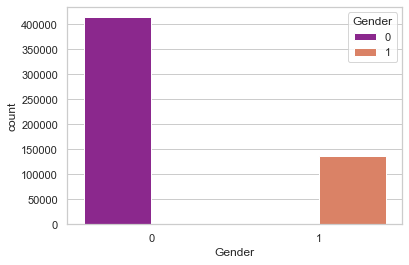

In [113]:
sns.countplot(x='Gender',data=black_fri,palette='plasma',hue='Gender')


So by the plot there are more than 400000 male customers & female customers are in between 100000 to 150000.



 * Age column



<AxesSubplot:xlabel='Age', ylabel='count'>

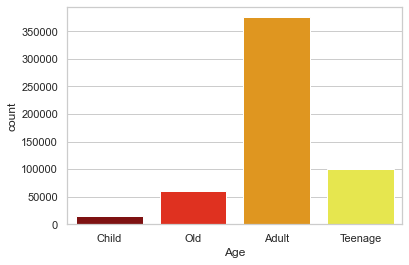

In [114]:
sns.countplot(x='Age',data=black_fri,palette='hot')


Here Adult age group is higher in count, Teenage is around 100000, old age group is more than 50000 & child age group is near to 0.

So, child & Old age group has less count in dataset

* Occupation , city , years in city , Marital_Status columns

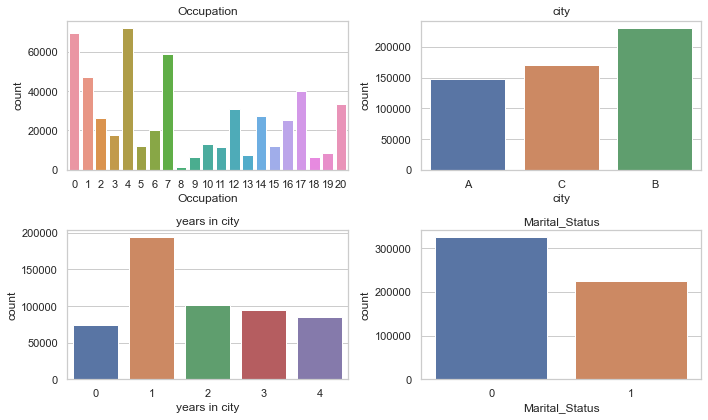

In [41]:
fig,ax=plt.subplots(2,2, figsize=(10,6))
######## occupation #########
sns.countplot(x='Occupation',data=black_fri,ax = ax[0,0])
ax[0,0].set_title('Occupation') 
######## city #########
sns.countplot(x='city',data=black_fri,ax = ax[0,1])
ax[0,1].set_title('city') 
######## years in city #########
sns.countplot(x='years in city',data=black_fri,ax = ax[1,0])
ax[1,0].set_title('years in city') 
######## Marital_Status #########
sns.countplot(x='Marital_Status',data=black_fri,ax = ax[1,1])
ax[1,1].set_title('Marital_Status') 

plt.tight_layout()
plt.show()

1* Occupation: In our dataset occupation 0,4 & 7 is high in count.

2* City: city B counted more than other two cities.

3* years in city: Customers who completed 1 year in city are nearly 200000.

4* Marrital status: Unmarried customers's count more than married customers.

* Product_Category_1,Product_Category_2 & Product_Category_3 columns

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

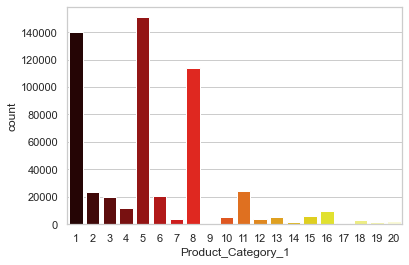

In [42]:
sns.countplot(x='Product_Category_1',data=black_fri,palette='hot')


In Product_Category_1 column 5 & 1 product category counted more than others. 1 is around 140000 & 5 is more than 140000.



<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

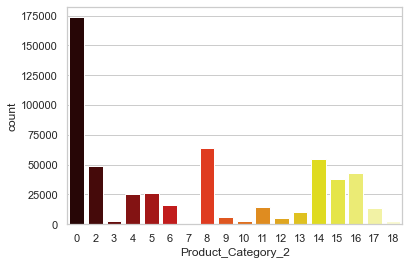

In [43]:
sns.countplot(x='Product_Category_2',data=black_fri,palette='hot')


In Product_Category_2 column 0 counted more than others & it is around 175000. So custmores not bought items in this category, very few amount of people bought from 8 & 14 category.

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

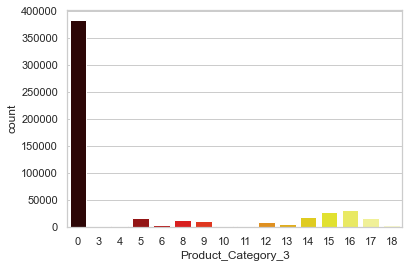

In [44]:
sns.countplot(x='Product_Category_3',data=black_fri,palette='hot')


Customers not bought any item from this category. 0 count is more.



So, we can conclude that Product_Category_1 is demanding category among all custmores because in Product_Category_2 & Product_Category_3 0 count is more as we know we replace NaN values to 0.

* Purchase Distribution

/Users/mohithihoriya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution')

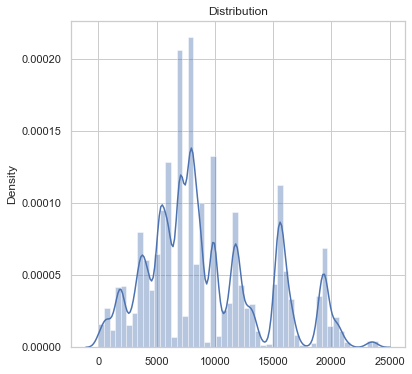

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=1 ,figsize=(6,6))

sns.distplot(x=black_fri['Purchase'])
axes.set_title('Distribution')


* check for outliers

Text(0.5, 1.0, 'Outliers')

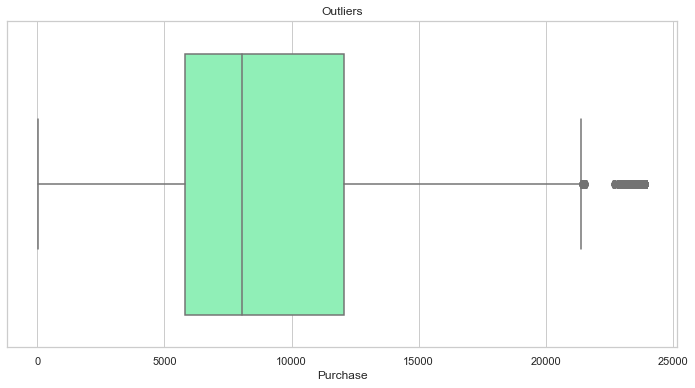

In [46]:
fig, axes = plt.subplots(nrows=1,ncols=1 ,figsize=(12,6))
sns.boxplot(x='Purchase', data=black_fri, palette='rainbow')
axes.set_title('Outliers')


In this plot there are some outliers near to 25000. Some custmers purchase products more than normal count.



<AxesSubplot:xlabel='Purchase'>

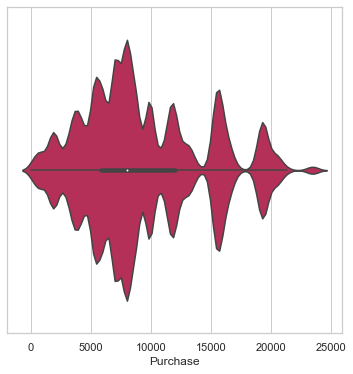

In [47]:
fig, axes = plt.subplots(nrows=1,ncols=1 ,figsize=(6,6))
sns.violinplot(x='Purchase',data=black_fri,palette="rocket_r")

The violin plot gives kernel density estimation of the underlying distribution. In this plot the curves shows that high purchase rate is between 5000 to 10000.



Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group


1)Gender



In [48]:
df1=black_fri.groupby('Gender').agg({'Purchase':'mean'})
df1.reset_index(inplace=True)
df1

,Gender,Purchase
0,0,9437.526040
1,1,8734.565765


/Users/mohithihoriya/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:503: UserWarning: Attempting to set identical bottom == top == 0.1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


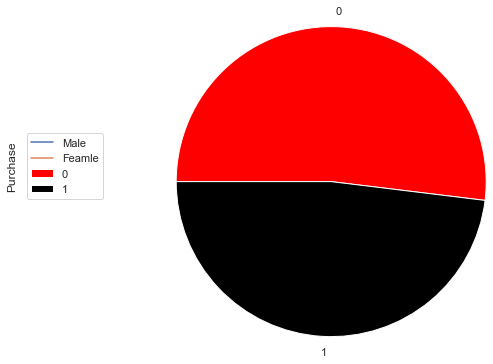

In [49]:
df1.plot.pie(y='Purchase', figsize=(5, 5),xlim=(2,0.2),ylim=(0.1,0.1),cmap='flag')
plt.plot(0, label="Male")
plt.plot(1, label="Feamle")
  
plt.legend(loc='center left')

Here purchase rate of male customers is quite higher than female customers.



2)Marital Status



/Users/mohithihoriya/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:503: UserWarning: Attempting to set identical bottom == top == 0.1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


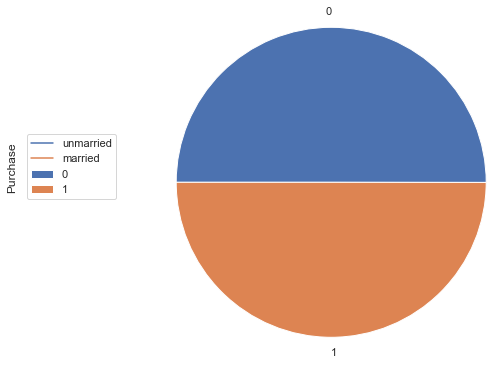

In [50]:
df2=black_fri.groupby('Marital_Status').agg({'Purchase':'mean'})
df2.reset_index(inplace=True)
df2.plot.pie(y='Purchase', figsize=(5, 5),xlim=(2,0.2),ylim=(0.1,0.1))
plt.plot(0, label="unmarried")
plt.plot(1, label="married")
plt.legend(loc='center left')

Both married & unmarried customers purchase product equally.



In [51]:
black_fri.head(2)


,User_ID,Product_ID,Gender,Age,Occupation,city,years in city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,0,0,8370
1,1000001,P00248942,1,Child,10,A,2,0,1,6,14,15200


1.occupation & occupation vs purchase


<AxesSubplot:xlabel='Occupation', ylabel='count'>

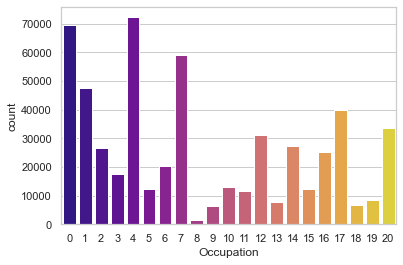

In [52]:
sns.countplot(x='Occupation',data=black_fri,palette='plasma')


In our dataset occupation 0,4 & 7 is high in count.



<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

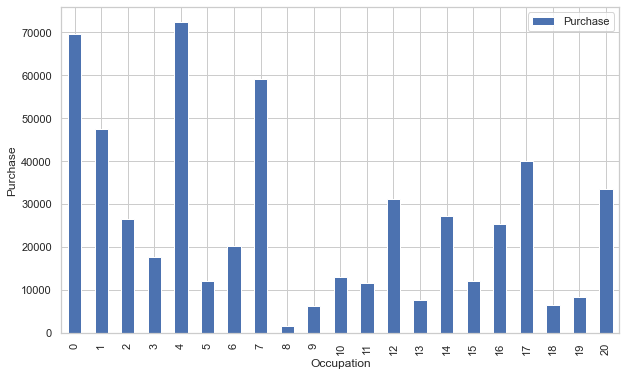

In [53]:
df3=black_fri.groupby('Occupation').agg({'Purchase':'count'})
df3.reset_index(inplace=True)
df3.plot(x='Occupation',y='Purchase',ylabel='Purchase',kind='bar',figsize=(10,6))


Here 0,5 & 7 occupation purchase more products than other occupation.

Looking at the plot 8,9,13,18,19 occupation purchased less than 100000.

and 10,11 occupation purchased less than 200000

1.purchase by city

<AxesSubplot:xlabel='city'>

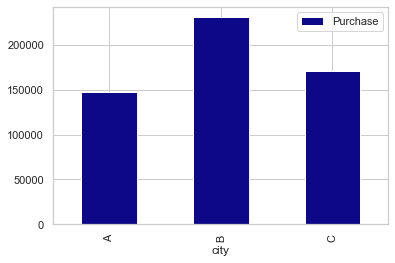

In [54]:
df4=black_fri.groupby('city').agg({'Purchase':'count'})
df4.reset_index(inplace=True)
df4.plot(kind='bar',x='city',y='Purchase',cmap='plasma')

City B purchased more than other two cities. B purchased more than 200000.

1.purchase by age & Age vs Purchased

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

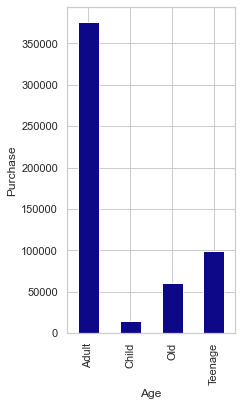

In [56]:
df5=black_fri.groupby('Age').agg({'Purchase':'count'})
df5.reset_index(inplace=True)
df5.plot(kind='bar',x='Age',y='Purchase',cmap='plasma',figsize=(3,6),ylabel='Purchase',legend=False)

Here, Adult age group purchased more than 350000.

Comparitively, Child,Old,Teenage purchase less than 100000.

* Productcategory1 vs Purchased
* Productcategory2 vs Purchased
* Productcategory3 vs Purchased

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

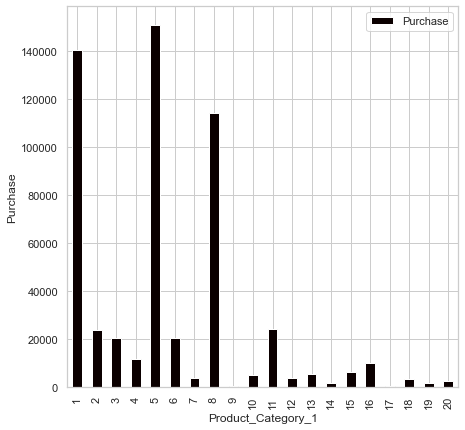

In [57]:
df6=black_fri.groupby('Product_Category_1').agg({'Purchase':'count'})
df6.reset_index(inplace=True)
df6.plot(kind='bar',x='Product_Category_1',y='Purchase',ylabel='Purchase',cmap='hot',figsize=(7,7))

By this plot product category 1,5 & 8 purchased more than others.

Product 5 is high purchased item by customers.

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

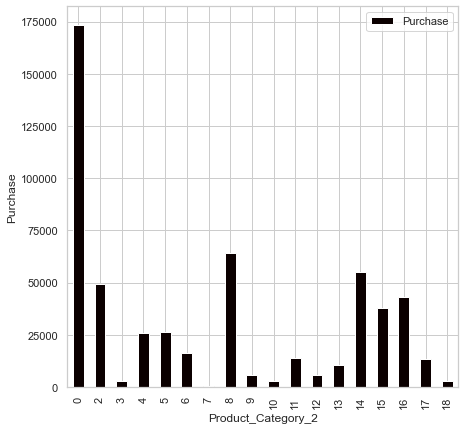

In [58]:
df7=black_fri.groupby('Product_Category_2').agg({'Purchase':'count'})
df7.reset_index(inplace=True)
df7.plot(kind='bar',x='Product_Category_2',y='Purchase',ylabel='Purchase',cmap='hot',figsize=(7,7))

By this plot product category 2,8 & 14 purchased averagely than others.

But product 0 is high in count near to 175000, so many customers not purchase any item from this category.

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

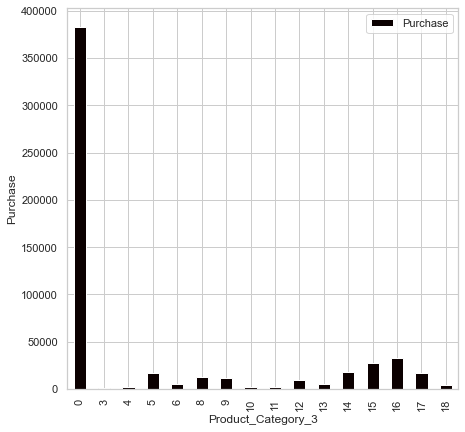

In [59]:
df8=black_fri.groupby('Product_Category_3').agg({'Purchase':'count'})
df8.reset_index(inplace=True)
df8.plot(kind='bar',x='Product_Category_3',y='Purchase',ylabel='Purchase',cmap='hot',figsize=(7,7))

By looking at Product_Category_3 plot so many customers not purchase any item, few amount of customers bought from this category.

So, plot for all product categories against purchase shows that Product_Category_1 is most popular product category among all categories. Product_Category_2 is averagly popular & Product_Category_3 is not so popular.

* City category pie chart

/Users/mohithihoriya/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:503: UserWarning: Attempting to set identical bottom == top == 0.1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


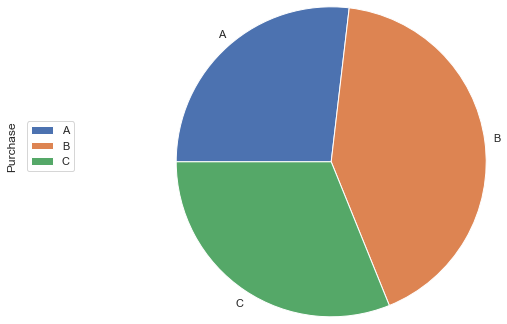

In [61]:
df9=black_fri.groupby('city').count()
df9.plot(kind='pie',y='Purchase',figsize=(5,5),xlim=(2,0.2),ylim=(0.1,0.1))
plt.legend(loc='center left')

So, here city B purchased more than other two cities

* product catgory 1 vs Gender,Age,Occupation,city,years in city,Marital_Status.

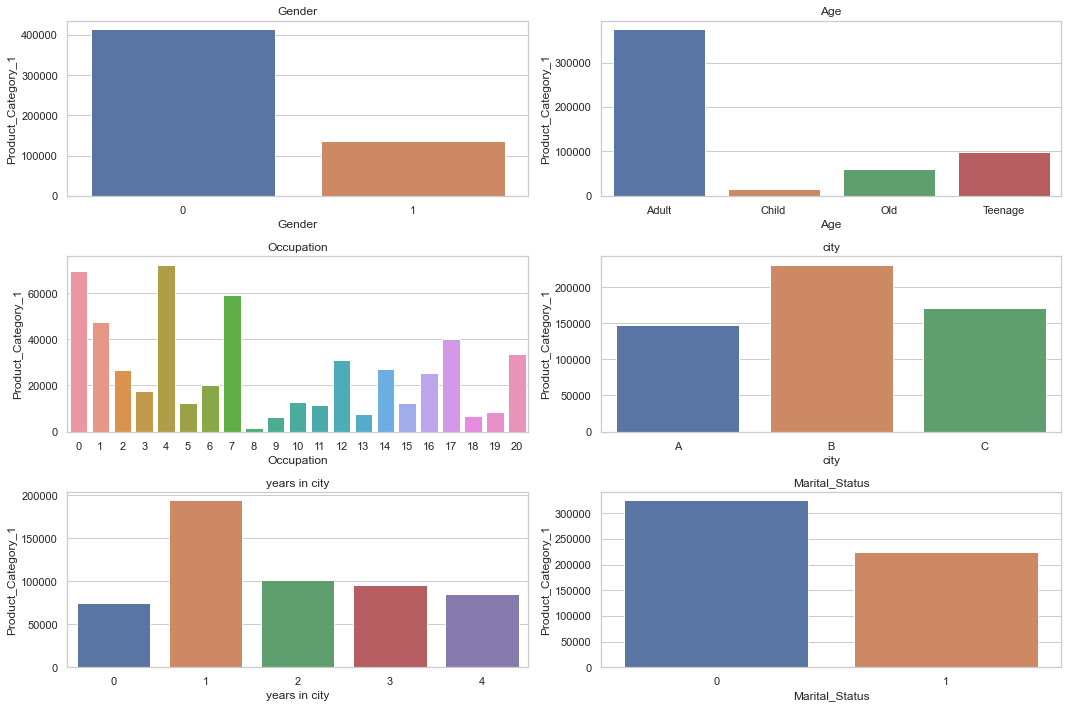

In [62]:
########### Gender #########
df10=black_fri.groupby('Gender').agg({'Product_Category_1':'count'})
df10.reset_index(inplace=True)


########### Age ####
df11=black_fri.groupby('Age').agg({'Product_Category_1':'count'})
df11.reset_index(inplace=True)


########### Occupation #########
df12=black_fri.groupby('Occupation').agg({'Product_Category_1':'count'})
df12.reset_index(inplace=True)


########### city#######
df13=black_fri.groupby('city').agg({'Product_Category_1':'count'})
df13.reset_index(inplace=True)

########### years in city #########
df14=black_fri.groupby('years in city').agg({'Product_Category_1':'count'})
df14.reset_index(inplace=True)


########### Marital_Status ########
df15=black_fri.groupby('Marital_Status').agg({'Product_Category_1':'count'})
df15.reset_index(inplace=True)

############

fig,ax=plt.subplots(3,2, figsize=(15,10))

###### Gender ########
sns.barplot(x='Gender',y='Product_Category_1',data=df10,ax = ax[0,0])
ax[0,0].set_title('Gender') 

######## Age #########
sns.barplot(x='Age',y='Product_Category_1',data=df11,ax = ax[0,1])
ax[0,1].set_title('Age') 

######## occupation #########
sns.barplot(x='Occupation',y='Product_Category_1',data=df12,ax = ax[1,0])
ax[1,0].set_title('Occupation') 

######## city #########
sns.barplot(x='city',y='Product_Category_1',data=df13,ax = ax[1,1])
ax[1,1].set_title('city') 

######## years in city #########
sns.barplot(x='years in city',y='Product_Category_1',data=df14,ax = ax[2,0])
ax[2,0].set_title('years in city') 

######## Marital_Status #########
sns.barplot(x='Marital_Status',y='Product_Category_1',data=df15,ax = ax[2,1])
ax[2,1].set_title('Marital_Status') 

plt.tight_layout()
plt.show()

1)So,Product_Category_1 count is more in male customers than female customers.

2)Adult age group is counted more in Product_Category_1.

3)4,0 & 7 occupation purchase more.

4)High count of puchased items are from city B.

5)Those who completed 1 year in city purchase many items from this category. Customers who completed more than 2 to 4 years puchased averagely.

6)Unmarried customers purhased more than married customers.

* Product_catgory_2 vs Gender,Age,Occupation,city,years in city,Marital_Status.

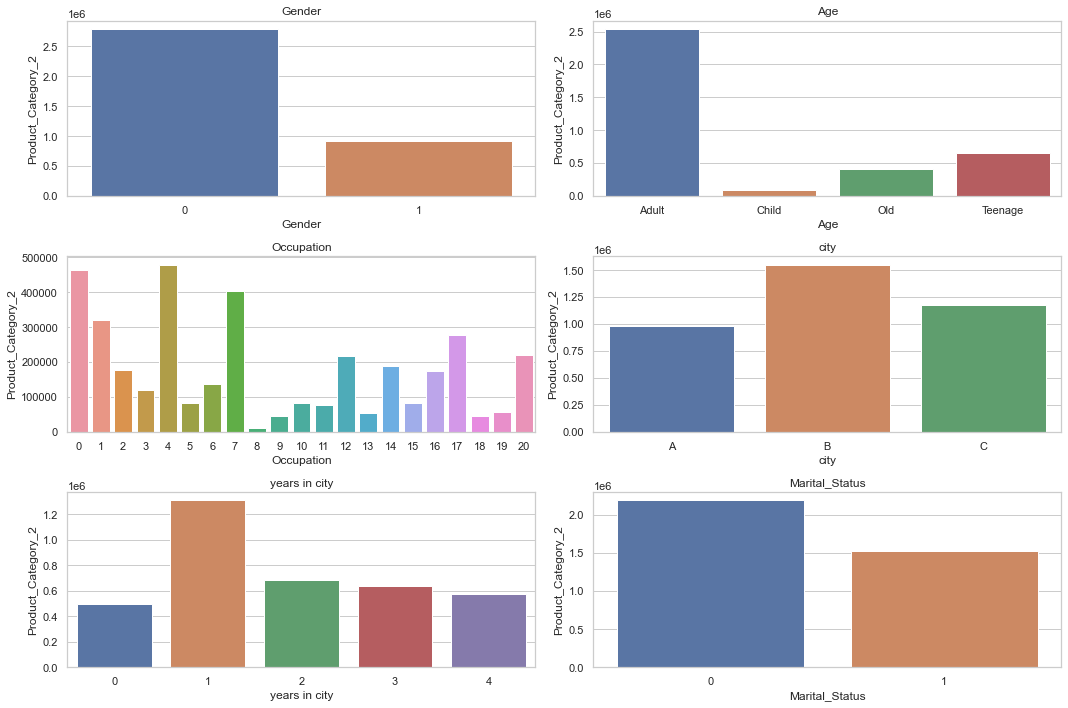

In [63]:
########### Gender #########
df16=black_fri.groupby('Gender').agg({'Product_Category_2':'sum'})
df16.reset_index(inplace=True)


########### Age ####
df17=black_fri.groupby('Age').agg({'Product_Category_2':'sum'})
df17.reset_index(inplace=True)


########### Occupation #########
df18=black_fri.groupby('Occupation').agg({'Product_Category_2':'sum'})
df18.reset_index(inplace=True)


########### city#######
df19=black_fri.groupby('city').agg({'Product_Category_2':'sum'})
df19.reset_index(inplace=True)


########### years in city #########
df20=black_fri.groupby('years in city').agg({'Product_Category_2':'sum'})
df20.reset_index(inplace=True)

########### Marital_Status ########
df21=black_fri.groupby('Marital_Status').agg({'Product_Category_2':'sum'})
df21.reset_index(inplace=True)

############

fig,ax=plt.subplots(3,2, figsize=(15,10))

###### Gender ########
sns.barplot(x='Gender',y='Product_Category_2',data=df16,ax = ax[0,0])
ax[0,0].set_title('Gender') 

######## Age #########
sns.barplot(x='Age',y='Product_Category_2',data=df17,ax = ax[0,1])
ax[0,1].set_title('Age') 

######## occupation #########
sns.barplot(x='Occupation',y='Product_Category_2',data=df18,ax = ax[1,0])
ax[1,0].set_title('Occupation') 

######## city #########
sns.barplot(x='city',y='Product_Category_2',data=df19,ax = ax[1,1])
ax[1,1].set_title('city') 

######## years in city #########
sns.barplot(x='years in city',y='Product_Category_2',data=df20,ax = ax[2,0])
ax[2,0].set_title('years in city') 

######## Marital_Status #########
sns.barplot(x='Marital_Status',y='Product_Category_2',data=df21,ax = ax[2,1])
ax[2,1].set_title('Marital_Status') 

plt.tight_layout()
plt.show()

1)So, Sum of male customers in Product_Category_2 is more than female customers.

2)Sum of adult age group is more in Product_Category_2.

3)Sum of purchased items is more in 4,0 & 7 occupation.

4)Sum of items puchased is higher in city B.

5)Those who completed 1 year in city purchase many items from this category. Customers who completed more than 2 to 4 years puchased averagely.

6)Unmarried customers purhased more than married customers.

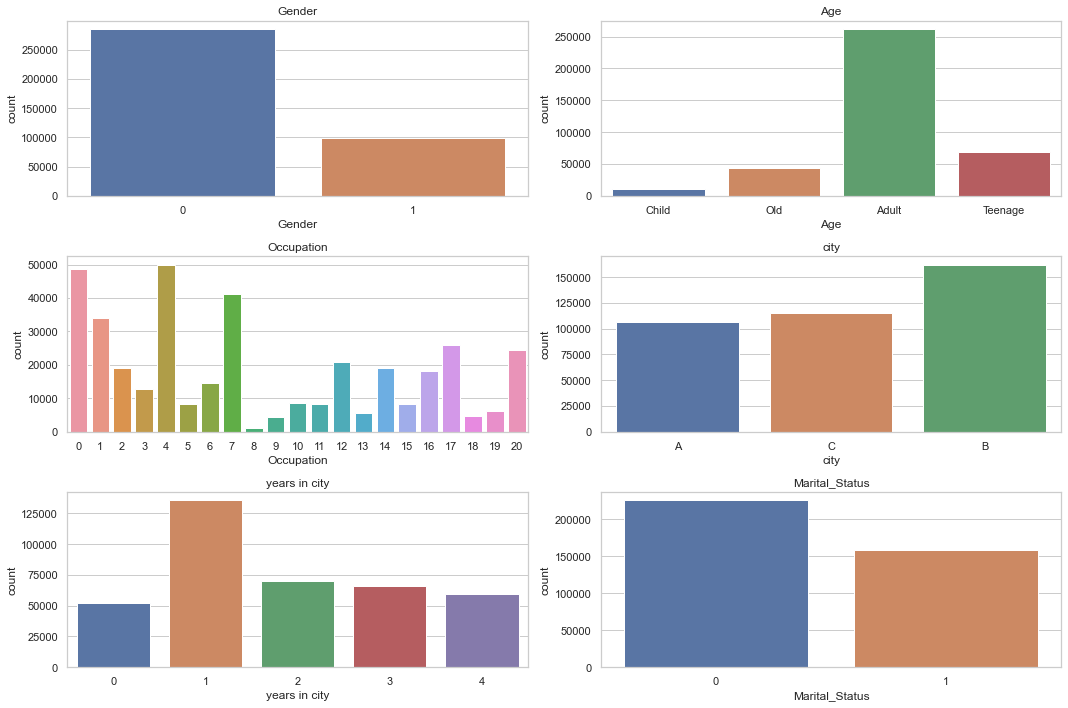

In [64]:
df22=black_fri[black_fri['Product_Category_3']==0]

############

fig,ax=plt.subplots(3,2, figsize=(15,10))

###### Gender ########
sns.countplot(x='Gender',data=df22,ax = ax[0,0])
ax[0,0].set_title('Gender') 

######## Age #########
sns.countplot(x='Age',data=df22,ax = ax[0,1])
ax[0,1].set_title('Age') 

######## occupation #########
sns.countplot(x='Occupation',data=df22,ax = ax[1,0])
ax[1,0].set_title('Occupation') 

######## city #########
sns.countplot(x='city',data=df22,ax = ax[1,1])
ax[1,1].set_title('city') 

######## years in city #########
sns.countplot(x='years in city',data=df22,ax = ax[2,0])
ax[2,0].set_title('years in city') 

######## Marital_Status #########
sns.countplot(x='Marital_Status',data=df22,ax = ax[2,1])
ax[2,1].set_title('Marital_Status') 

plt.tight_layout()
plt.show()

1) More male customers not bought many items from Product_Category_3 than female customers.

2) In 'Age' column adult age group not bought items from Product_Category_3 so, we can say that in Product_Category_3 there are items adult age group cannot bought.

3) Occupation 0,4 & 7 not purchased any item from Product_Category_3.

4) City B also not bought items from Product_Category_3 its count is more than 150000.

5) Who completed more than 1 year in city not bought items from Product_Category_3.

6) Who are unmarried not bought items from Product_Category_3.

So, we can conclude that Product_Category_3 may contain such items that no any customer can buy.